In [89]:
import numpy as np
from fbprophet import Prophet
import pandas as pd

df = pd.read_excel('서울시 자동차 종별 대수 변화.xls')
df.head()

,기간,구분,계,1000cc 미만,1000cc 이상~1600cc 미만,1600cc 이상~2000cc 미만,2000cc 이상~2500cc 미만,2500cc 이상,저속전기차,전기차
0,2010,구분,2434230,131793,568822,1027372,245005,461191,42,5
1,2011,구분,2443261,142436,550554,1027205,248135,474837,53,41
2,2012,구분,2447876,155999,529430,1032814,251346,478174,65,48
3,2013,구분,2462515,164160,514628,1044621,257482,481438,52,134
4,2014,구분,2510742,172323,507056,1064745,275300,490903,37,378


In [92]:
num_of_electro = pd.DataFrame(columns = ['ds', 'y'])
idx1 = pd.Series(pd.date_range('2010-01-01', '2021-01-02', freq='Y'))
idx2 = df['전기차'].values

print(idx1)
print(idx2)

0    2010-12-31
1    2011-12-31
2    2012-12-31
3    2013-12-31
4    2014-12-31
5    2015-12-31
6    2016-12-31
7    2017-12-31
8    2018-12-31
9    2019-12-31
10   2020-12-31
dtype: datetime64[ns]
[    5    41    48   134   378   694   785  1191  4745  9796 17463]


In [93]:
num_of_electro['ds'] = idx1
num_of_electro['y'] = idx2
num_of_electro.head(10)

,ds,y
0,2010-12-31,5
1,2011-12-31,41
2,2012-12-31,48
3,2013-12-31,134
4,2014-12-31,378
5,2015-12-31,694
6,2016-12-31,785
7,2017-12-31,1191
8,2018-12-31,4745
9,2019-12-31,9796


In [94]:
m = Prophet()
m.fit(num_of_electro)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [97]:
future = m.make_future_dataframe(periods=100)
forecast = m.predict(future)

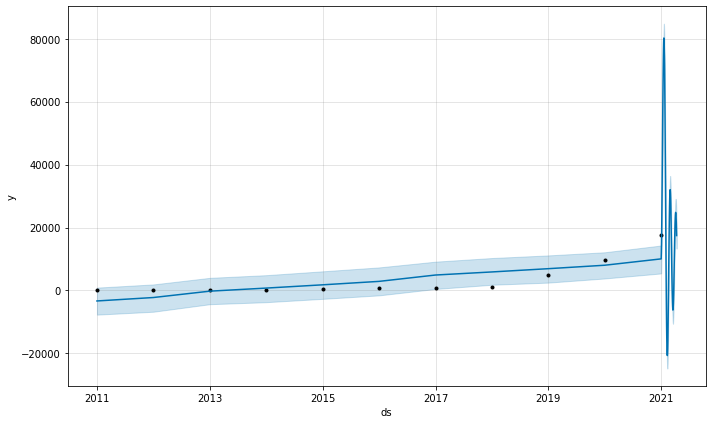

In [98]:
fig1 = m.plot(forecast)

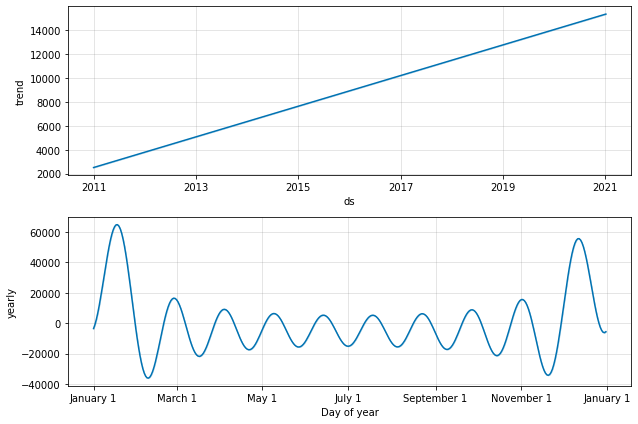

In [75]:
fig2 = m.plot_components(forecast)

In [87]:
m = Prophet(yearly_seasonality=15)
m.fit(num_of_electro)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


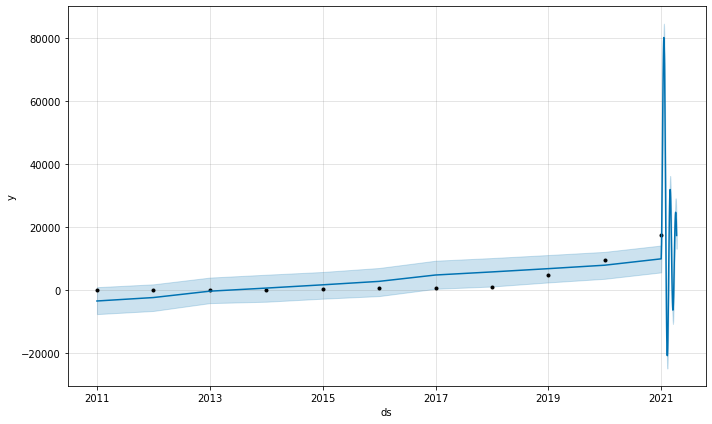

In [99]:
future = m.make_future_dataframe(periods=100)
forecast = m.predict(future)
fig1 = m.plot(forecast)